# **EDA on video games sales dataset**

**Dataset:** https://www.kaggle.com/datasets/gregorut/videogamesales

About Dataset
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.

In [2]:
# import the required libraries

import numpy as no
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

In [3]:
data = pd.read_csv("/content/vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data.shape

(16598, 11)

In [5]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

**Having Missing Values in Year and Publisher columns**

In [8]:
data["Year"].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [9]:
data["Year"] = data["Year"].fillna(data["Year"].mean())

In [11]:
data["Publisher"] = data["Publisher"].fillna(data["Publisher"].mode()[0])

In [13]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [18]:
## Dropping Rank as it is not required

data.drop(columns = ["Rank"],axis=1,inplace = True)
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [20]:
for i in data.columns:
 print('{} has {} no. of unique values'.format(i,data[i].nunique()))

Name has 11493 no. of unique values
Platform has 31 no. of unique values
Year has 40 no. of unique values
Genre has 12 no. of unique values
Publisher has 578 no. of unique values
NA_Sales has 409 no. of unique values
EU_Sales has 305 no. of unique values
JP_Sales has 244 no. of unique values
Other_Sales has 157 no. of unique values
Global_Sales has 623 no. of unique values


### **Univariate Analysis**

In [25]:
data["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

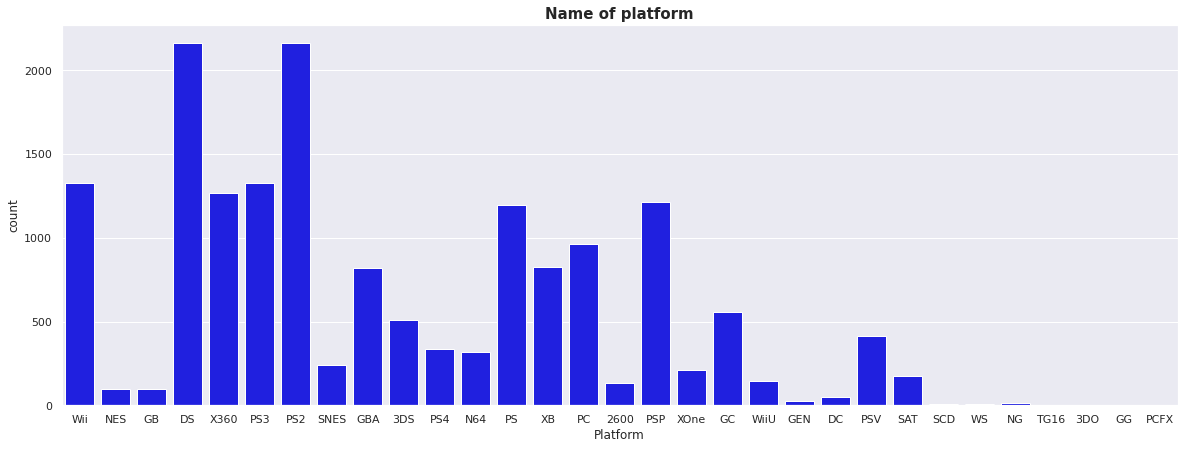

In [24]:
plt.figure(figsize=(20,7))
sns.countplot(x=data['Platform'],color='blue')
plt.title("Name of platform",fontweight="bold",fontsize = 15)
plt.show()

In [27]:
data["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [28]:
data["Genre"].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

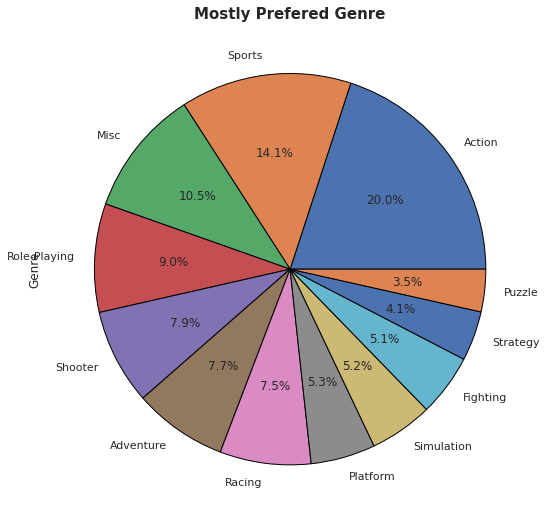

In [34]:
plt.figure(figsize=(9,9))
data["Genre"].value_counts().plot(kind = "pie",autopct = "%0.1f%%",wedgeprops={'edgecolor':'black'})
plt.title("Mostly Prefered Genre",fontsize = 15,fontweight="bold")
plt.show()

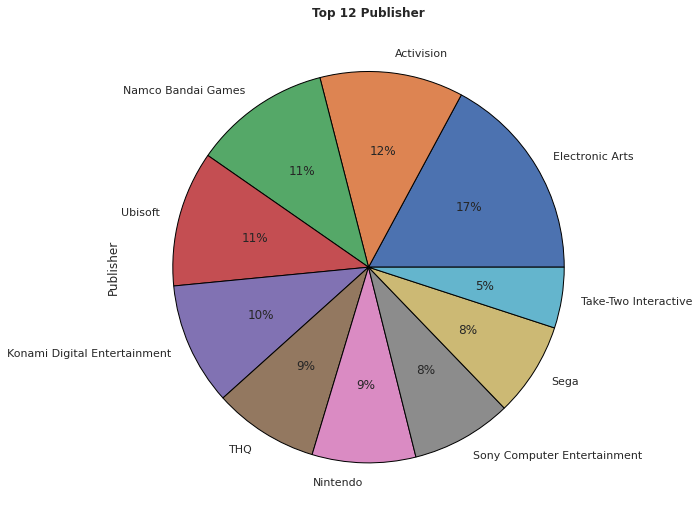

In [39]:
plt.figure(figsize=(9,9))
data['Publisher'].value_counts()[:10].plot(kind='pie', wedgeprops={'edgecolor':'black'},autopct='%1.f%%')
plt.title("Top 12 Publisher",fontweight="bold")
plt.show()

In [40]:
data.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

<Figure size 864x720 with 0 Axes>

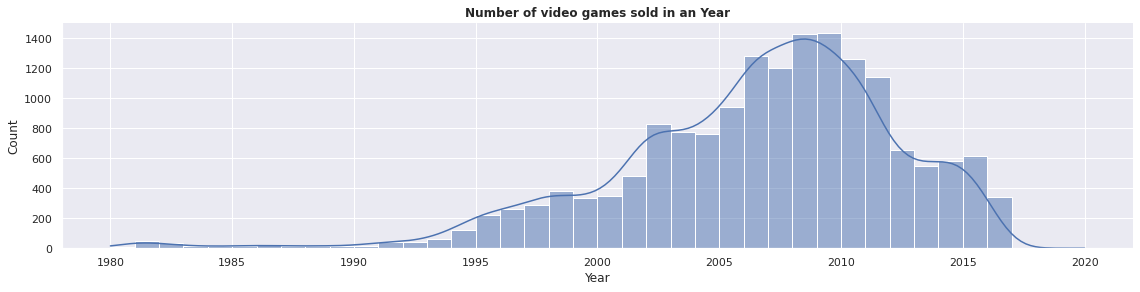

In [48]:
plt.figure(figsize=(12,10))
sns.displot(data,x='Year',kde=True,bins=40,aspect=4,height=4,palette='cool')
plt.title("Number of video games sold in an Year",fontweight="bold")
plt.show()

In [ ]:
cat_col = data.select_dtypes(include = ["object","category"]).columns

In [52]:
cat_col

Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')

In [49]:
num_col = data.select_dtypes(include = ["int","float"]).columns

In [50]:
num_col

Index(['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

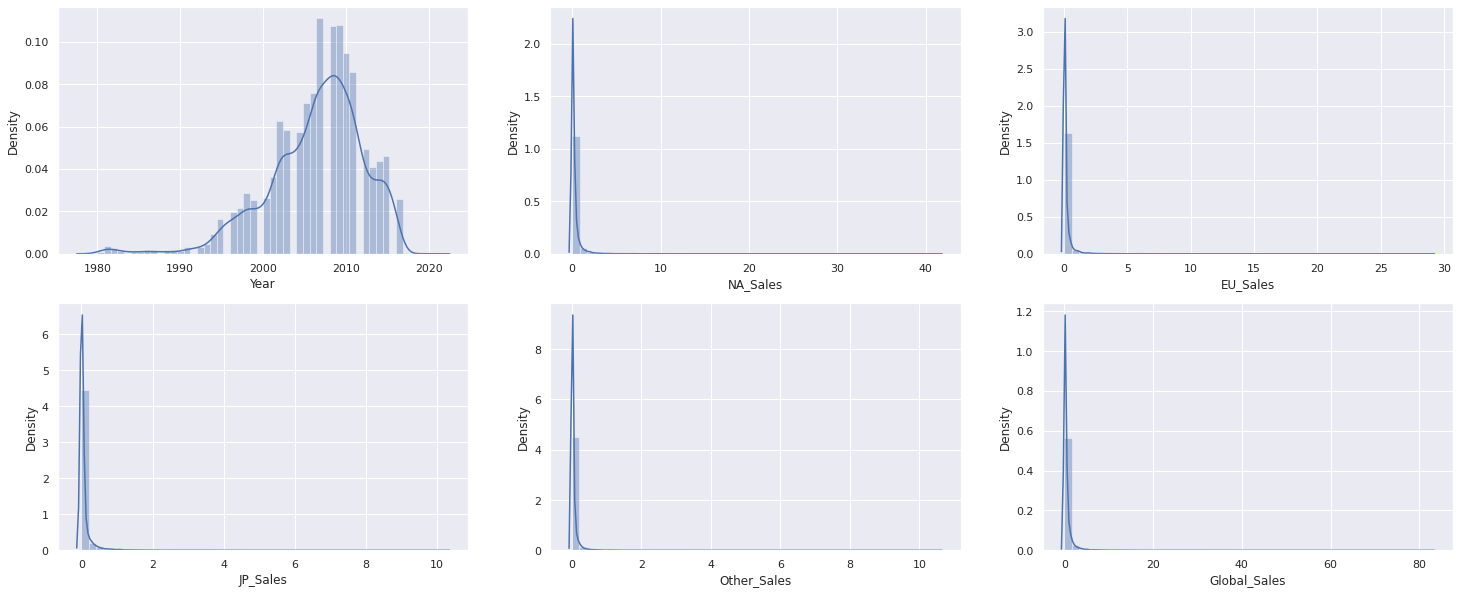

In [59]:
plt.figure(figsize=(25,10))
plotnumber = 1

for columns in num_col:
  if plotnumber <= 7:
    ax = plt.subplot(2,3,plotnumber)
    sns.distplot(data[columns])
    plt.xlabel(columns)
  plotnumber+=1
plt.show()

**Most Genre sold in North America**

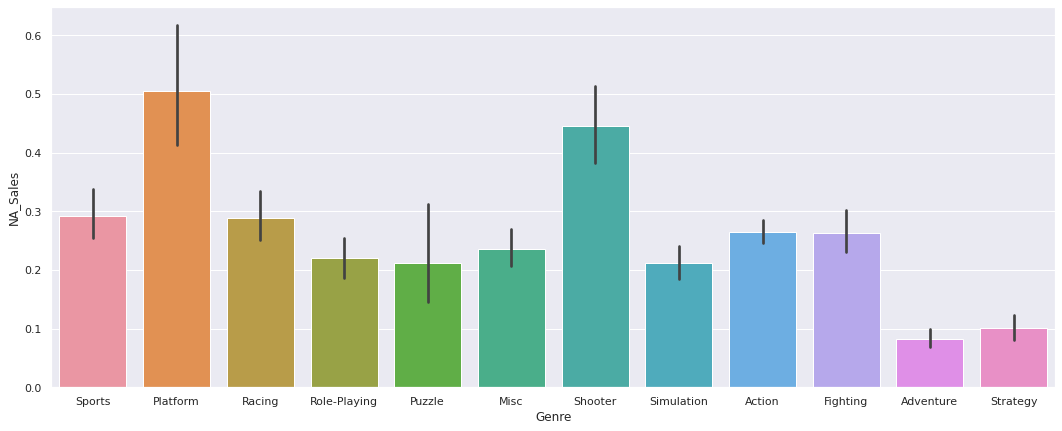

In [60]:
plt.figure(figsize=(18,7))
sns.barplot(data["Genre"],data["NA_Sales"])
plt.show()

**Most Genre sold in Europe**

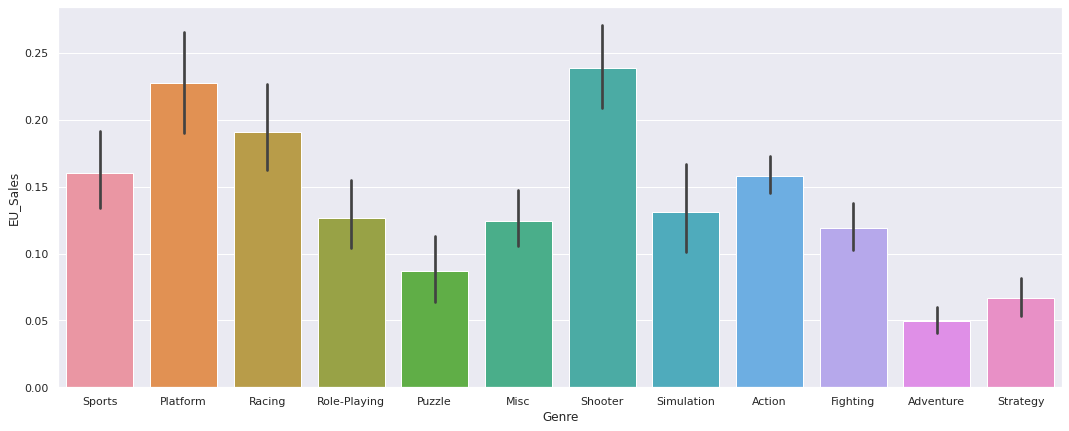

In [61]:
plt.figure(figsize=(18,7))
sns.barplot(data["Genre"],data["EU_Sales"])
plt.show()

**Most Genre Sold in Japan**

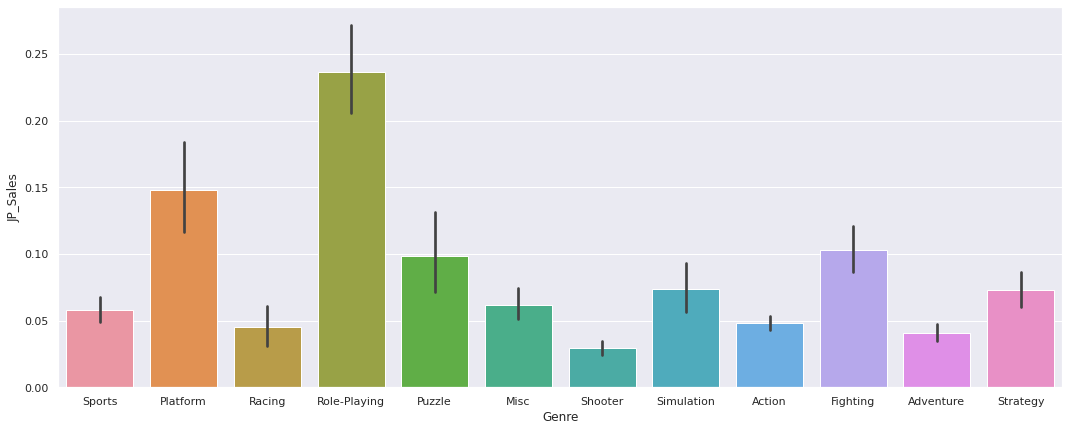

In [62]:
plt.figure(figsize=(18,7))
sns.barplot(data["Genre"],data["JP_Sales"])
plt.show()

**Most Genre Sold in Other Region**

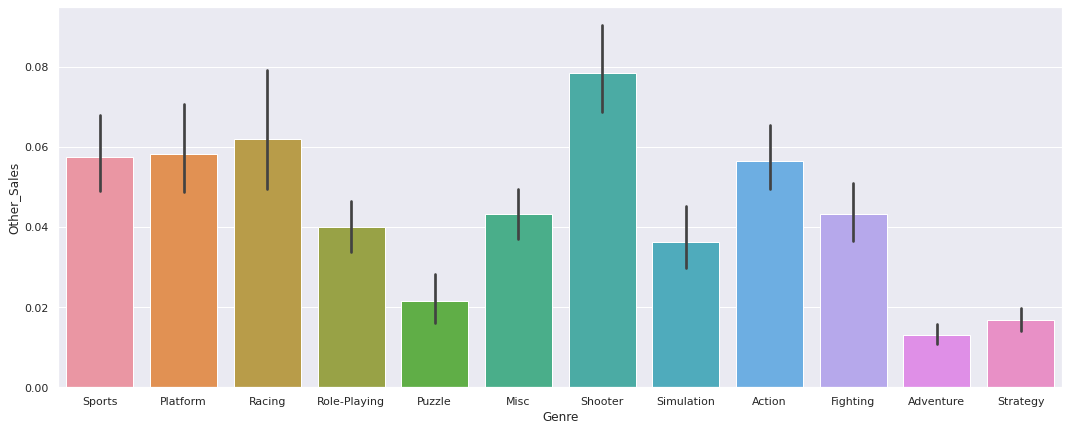

In [63]:
plt.figure(figsize=(18,7))
sns.barplot(data["Genre"],data["Other_Sales"])
plt.show()

**Most Genre Sold Worldwide**

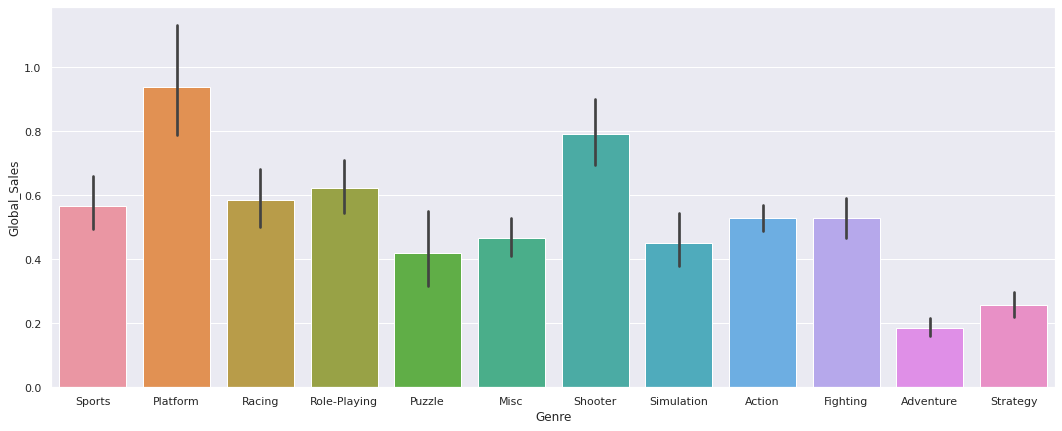

In [64]:
plt.figure(figsize=(18,7))
sns.barplot(data["Genre"],data["Global_Sales"])
plt.show()

### **Observation:**

 1- PS2 and DS are most used platform followed by Wil, PS3 and X360.

 2- Action and Sports are Most preferred Genre.

 3- Most of the sales occured between 2008 to 2011.

 4- Platform Genre has been preferred most in North America, followed by Shooting Genre.

 5- Shooting and platform games are preferred more in Europe, followed by Racing Genre.

 6- Role-Playing genre is preferred most in Japan almost twice than all others, followed by platform genre.

 7- From Other Regions Shooting genre is preferred more and Sports, Platform and Racing are equally preferred.

 8- If we see Globally, Platform genre has the highest sales i.e. more preferrence followed by Shooting games.

 9- Overall, Adventure genre games are least preferred.
 
 10- Electronic Arts, Activision, Namco Bandai Games, Ubisoft and Konami Digital Entertainment are top 5 publisher.

 11- Sales from all regions are almost Correlated.

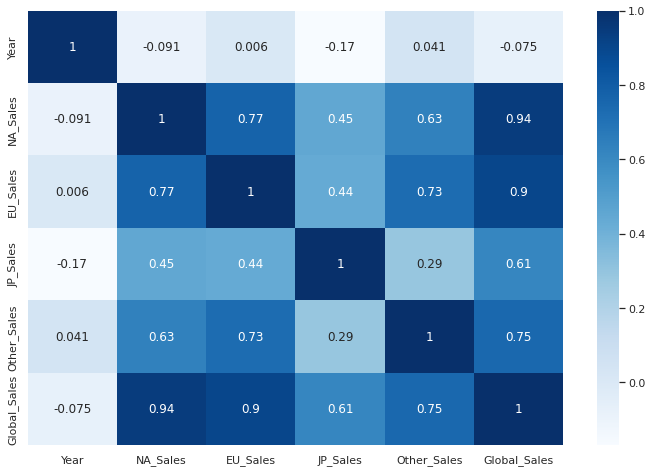

In [65]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap='Blues',annot = True)
plt.show()

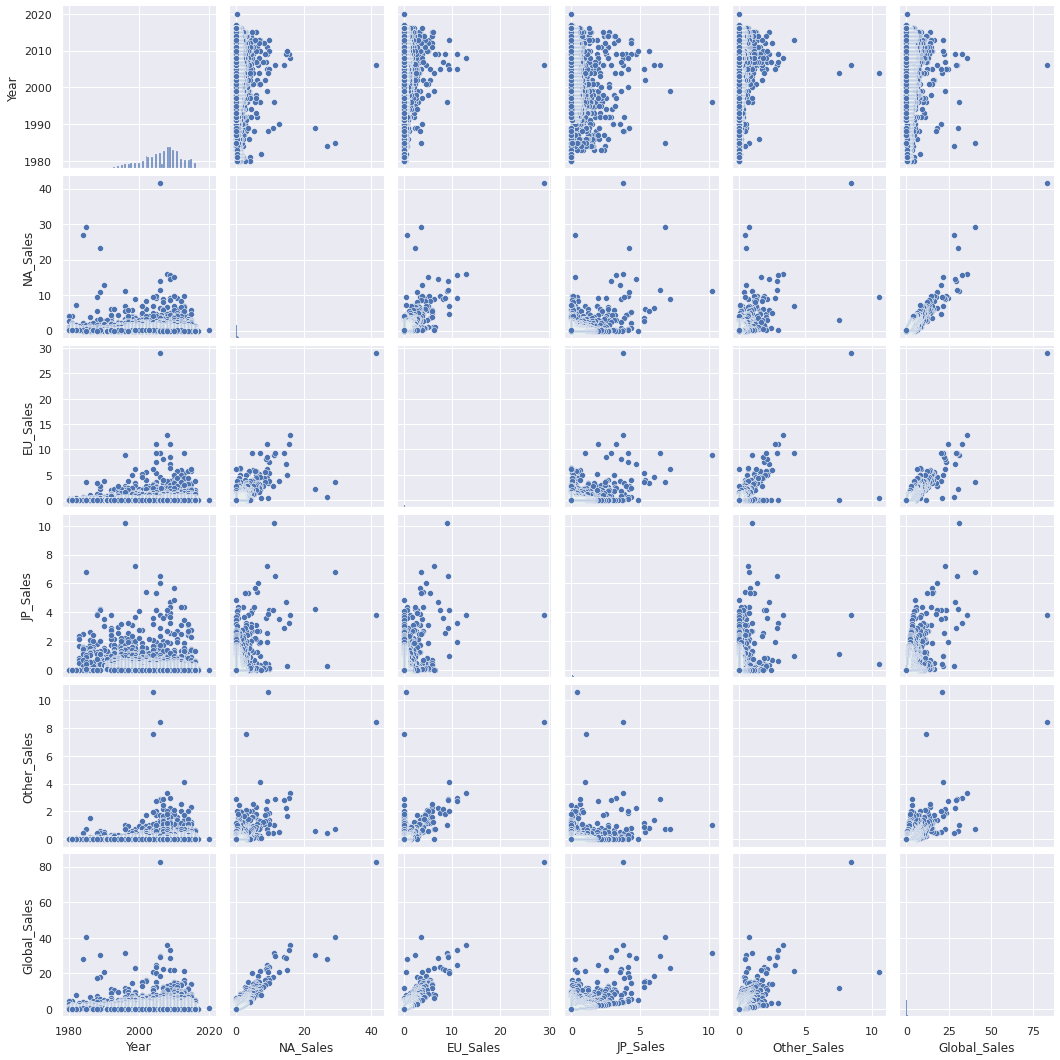

In [66]:
sns.pairplot(data)